In [1]:
library(tidyverse)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
processed_data <- read_csv("processed_survey.csv")
head(processed_data)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  Timestamp = col_datetime(format = ""),
  Country = col_character(),
  family_history = col_character(),
  Gender = col_character(),
  seek_help = col_character(),
  benefits = col_character(),
  prop = col_double()
)



X1,Timestamp,Country,family_history,Gender,seek_help,benefits,prop
<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
0,2014-08-27 11:29:31,United States,No,F,Yes,Yes,0.0008285004
1,2014-08-27 11:29:37,United States,No,M,Don't know,Don't know,0.0008285004
2,2014-08-27 11:29:44,Canada,No,M,No,No,0.0008285004
3,2014-08-27 11:29:46,United Kingdom,Yes,M,No,No,0.0008285004
4,2014-08-27 11:30:22,United States,No,M,Don't know,Yes,0.0008285004
5,2014-08-27 11:31:22,United States,Yes,M,Don't know,Yes,0.0008285004


In [3]:
percent <- function(x, digits = 2, format = "f", ...) {
  paste0(formatC(100 * x, format = format, digits = digits, ...), "%")
}

`summarise()` regrouping output by 'Country' (override with `.groups` argument)



Country,seek_help,sum_prop
<chr>,<chr>,<dbl>
United States,No,0.23446562
United States,Don't know,0.21126761
United States,Yes,0.14913007
United Kingdom,No,0.09196355
United Kingdom,Don't know,0.03396852
Canada,No,0.03314002


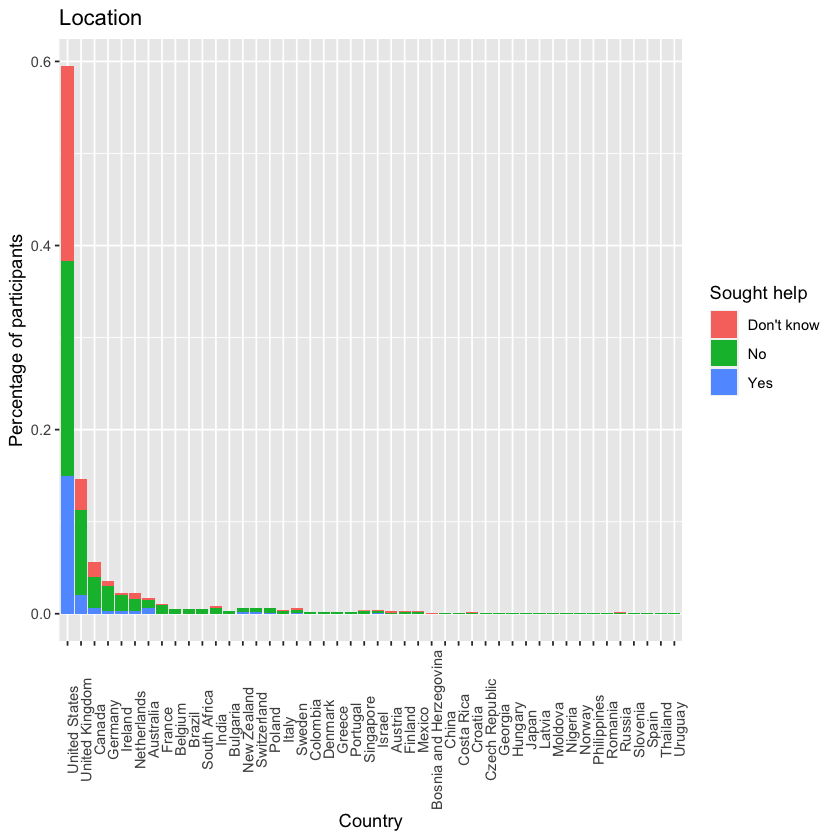

In [5]:
plot_data1 <- processed_data %>% group_by(Country, seek_help) %>% summarise(sum_prop = sum(prop)) %>% arrange(desc(sum_prop))
head(plot_data1)

ggplot(plot_data1, aes(x=reorder(Country, -sum_prop), y= sum_prop, fill=seek_help)) + 
  geom_bar(stat = "identity") + 
  ggtitle("Location") +
  xlab("Country") +
  ylab("Percentage of participants") + theme(axis.text.x = element_text(angle = 90)) +
  labs(fill = "Sought help")

`summarise()` regrouping output by 'family_history' (override with `.groups` argument)



family_history,Gender,sum_prop
<chr>,<chr>,<dbl>
No,M,0.52278376
Yes,M,0.28169014
Yes,F,0.10439105
No,F,0.09113505


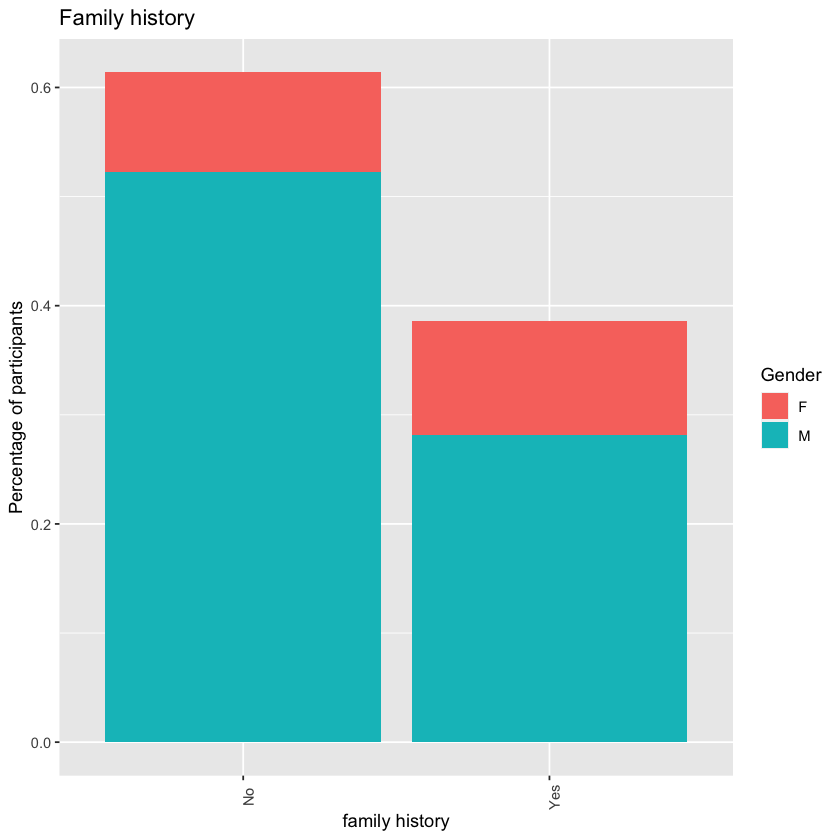

In [6]:
plot_data2 <- processed_data %>% group_by(family_history, Gender) %>% summarise(sum_prop = sum(prop)) %>% arrange(desc(sum_prop))
plot_data2

ggplot(plot_data2, aes(x=family_history, y=sum_prop, fill= Gender)) + 
  geom_bar(stat = "identity") + 
  ggtitle("Family history") +
  xlab("family history") +
  ylab("Percentage of participants") + theme(axis.text.x = element_text(angle = 90))

`summarise()` regrouping output by 'seek_help' (override with `.groups` argument)



seek_help,Gender,sum_prop
<chr>,<chr>,<dbl>
No,M,0.41922121
Don't know,M,0.23280862
Yes,M,0.15244408
No,F,0.09113505
Don't know,F,0.06048053
Yes,F,0.04391052


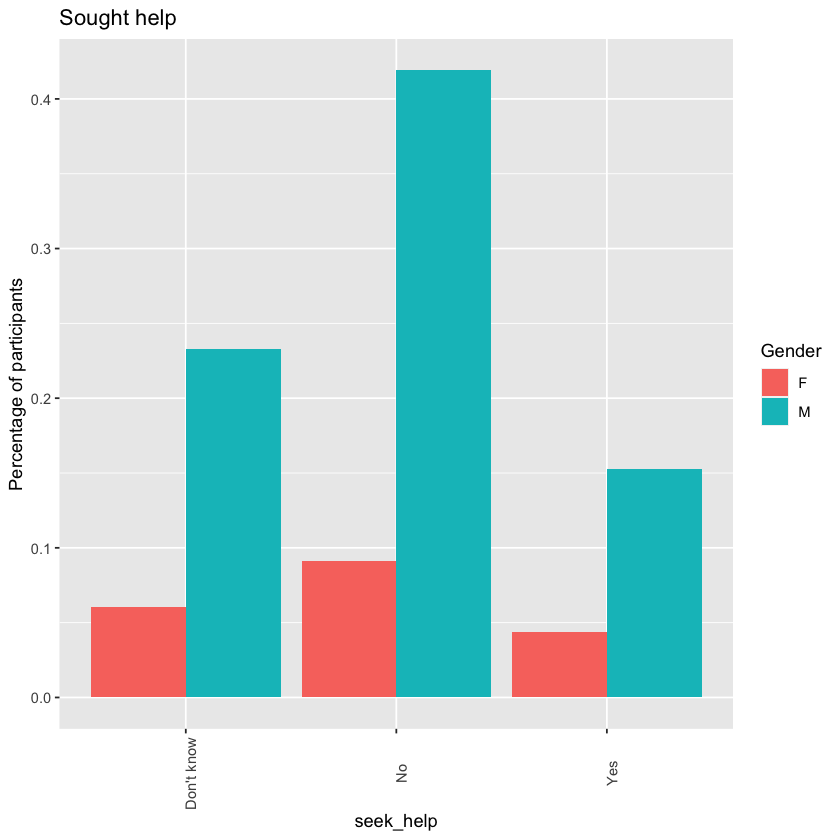

In [7]:
plot_data3 <- processed_data %>% group_by(seek_help, Gender) %>% summarise(sum_prop = sum(prop)) %>% arrange(desc(sum_prop))
plot_data3

ggplot(plot_data3, aes(x=seek_help, y=sum_prop, fill = Gender)) + 
  geom_bar(stat = "identity", position=position_dodge()) + 
  ggtitle("Sought help") +
  xlab("seek_help") +
  ylab("Percentage of participants") + theme(axis.text.x = element_text(angle = 90))

`summarise()` regrouping output by 'benefits' (override with `.groups` argument)



benefits,Gender,sum_prop
<chr>,<chr>,<dbl>
Don't know,M,0.27174814
Yes,M,0.27174814
No,M,0.26097763
Yes,F,0.10273405
Don't know,F,0.05550953
No,F,0.03728252


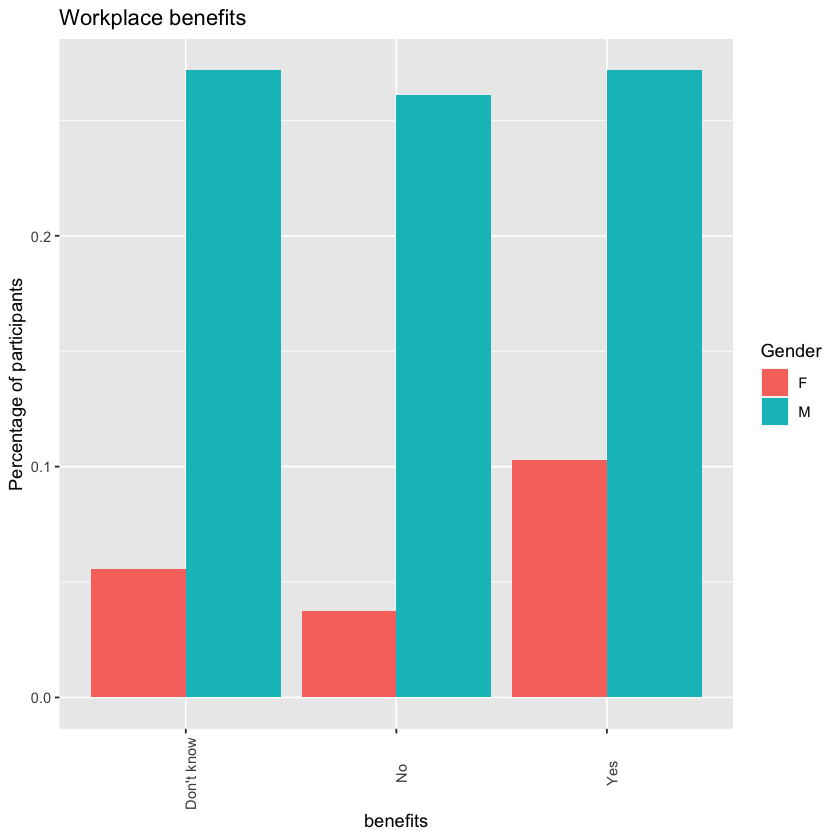

In [8]:
plot_data4 <- processed_data %>% group_by(benefits, Gender) %>% summarise(sum_prop = sum(prop)) %>% arrange(desc(sum_prop))
plot_data4

ggplot(plot_data4, aes(x=benefits, y=sum_prop, fill = Gender)) + 
  geom_bar(stat = "identity", position=position_dodge()) + 
  ggtitle("Workplace benefits") +
  xlab("benefits") +
  ylab("Percentage of participants") + theme(axis.text.x = element_text(angle = 90))